<a href="https://colab.research.google.com/github/jugalpanchal/ml-alien/blob/main/regression/support_vector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Regression (SVR)

## Importing the libraries

In [86]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [87]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [88]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [89]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [90]:
y = y.reshape(len(y),1) # 10 rows and 1 column
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling - Standardisation transform values into -2 to 2 or -2 to 3

In [91]:
# It transforms the actual values into -2 to 2 or -3 to 3 inbetween.
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [92]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [93]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [94]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf') # https://data-flair.training/blogs/svm-kernel-functions/
regressor.fit(X, y) # train the regression object model

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## Predicting a new result

In [95]:
# since we have used the scalling while traing the model so we need to scale(by using the same scaller) the new feature(input) value before predict a dependent value.
feature_new_val = sc_X.transform([[6.5]]) 
print('feature_new_val', feature_new_val)

pred_dep_val = regressor.predict(feature_new_val) # predict a dependent value of 6.5 but it would give a result in the scaller range.
print('pred_dep_val', pred_dep_val)

# since we used the scalling while training the model so we need to use the same scaller to inverse the value to get real value.
sc_y.inverse_transform(pred_dep_val) # It prints a value without a print statement.

feature_new_val [[0.34815531]]
pred_dep_val [-0.27861589]


array([170370.0204065])

## Visualising the SVR results

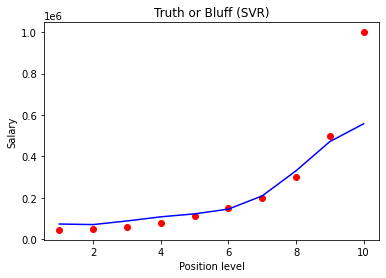

In [96]:
scale_inverse_x = sc_X.inverse_transform(X) # inverse the scalling values into the real values
scale_inverse_y = sc_y.inverse_transform(y) # inverse the scalling values into the real values
plt.scatter(scale_inverse_x, scale_inverse_y, color = 'red') # it would plot with real(inverse) values.

pred_sal_in_scale = regressor.predict(X) # X was scalled and replaced to the real value so it is already in the scale feature value.
pred_sal_in_real = sc_y.inverse_transform(pred_sal_in_scale) # inverse the scalled value into a real value
plt.plot(scale_inverse_x, pred_sal_in_real , color = 'blue')

plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

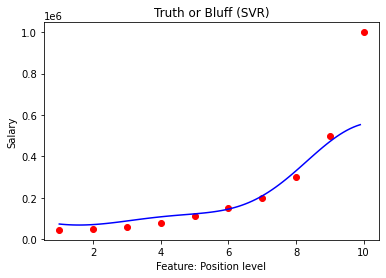

In [77]:
scale_inverse_x = sc_X.inverse_transform(X) # inverse the scalling values into the real values
scale_inverse_y = sc_y.inverse_transform(y) # inverse the scalling values into the real values

X_grid = np.arange(min(scale_inverse_x), max(scale_inverse_x), 0.1) # create a array
#print(X_grid) # [1.0 1.1 1.2 1.3 1.4 n.m]
X_grid = X_grid.reshape((len(X_grid), 1))
#print(X_grid) # convert into a 2D array. [[1. ] [1.1] [1.2] [1.3] [1.4] [n.m]]

plt.scatter(scale_inverse_x, scale_inverse_y, color = 'red') # plot red dots

X_grid_scale = sc_X.transform(X_grid) # scale it out before predicting a value
y_pred_val_scale = regressor.predict(X_grid_scale) # predict a scale value
y_pred_val_real = sc_y.inverse_transform(y_pred_val_scale) # inverse to get real value
plt.plot(X_grid, y_pred_val_real, color = 'blue')

plt.title('Truth or Bluff (SVR)')
plt.xlabel('Feature: Position level')
plt.ylabel('Salary')
plt.show()

# We see one point top-right is not covered because SVR can have such cases. There can be cases where few points are out of the line(tube)

# Difference between SVR vs Polynomial:
# SVR is less overfitting. We make it through the Scaler.
# But Polynomial is some overfitting of feature data and we select high degree.
# So SVR is much better with less overfitting data but can drop few points.